In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import os

In [82]:
house_train_set = pd.read_csv("train.csv")

In [83]:
house_train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
house_train_set.shape

(1460, 81)

In [85]:
house_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [86]:
house_train_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [87]:
# Confirming there are no duplicates
sum(house_train_set.duplicated())

0

In [88]:
# Checking for null values
house_train_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [89]:
# Need to drop LotFontgage column
house_train_set.drop("LotFrontage",axis = 1, inplace=True)

In [90]:
house_train_set.GarageYrBlt = house_train_set.GarageYrBlt.fillna(0)
house_train_set.MasVnrArea = house_train_set.MasVnrArea.fillna(0)
house_train_set.fillna('Missing value')

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Missing value,Reg,Lvl,AllPub,Inside,...,0,Missing value,Missing value,Missing value,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Missing value,Reg,Lvl,AllPub,FR2,...,0,Missing value,Missing value,Missing value,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,Missing value,IR1,Lvl,AllPub,Inside,...,0,Missing value,Missing value,Missing value,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,Missing value,IR1,Lvl,AllPub,Corner,...,0,Missing value,Missing value,Missing value,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,Missing value,IR1,Lvl,AllPub,FR2,...,0,Missing value,Missing value,Missing value,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Missing value,Reg,Lvl,AllPub,Inside,...,0,Missing value,Missing value,Missing value,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Missing value,Reg,Lvl,AllPub,Inside,...,0,Missing value,MnPrv,Missing value,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Missing value,Reg,Lvl,AllPub,Inside,...,0,Missing value,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Missing value,Reg,Lvl,AllPub,Inside,...,0,Missing value,Missing value,Missing value,0,4,2010,WD,Normal,142125


In [91]:
house_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [92]:
house_train_set.PoolQC.isnull().sum()

1453

In [93]:
# PoolQC also has lot of null values, so better to drop it
house_train_set.drop("PoolQC",axis = 1, inplace=True)

In [94]:
house_train_set.GarageYrBlt = house_train_set.GarageYrBlt.astype(int)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

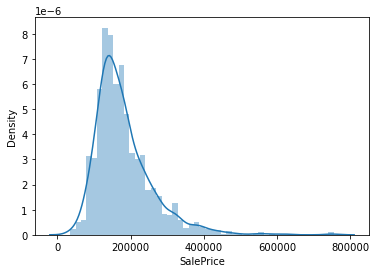

In [95]:
sns.distplot(house_train_set['SalePrice'])

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

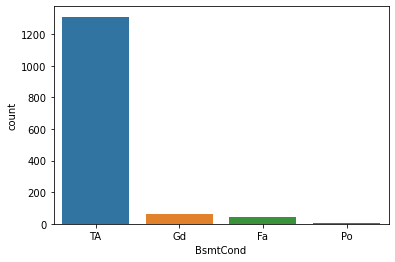

In [96]:
sns.countplot(x='BsmtCond', data= house_train_set)

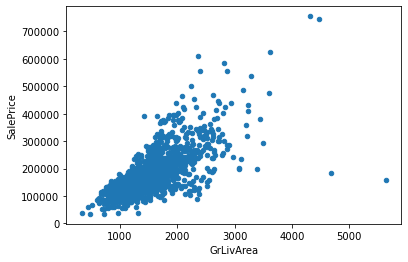

In [97]:
# Let's analyse scatter plot between SalePrice and GrLivArea

data = pd.concat([house_train_set['SalePrice'], house_train_set['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');

<AxesSubplot:xlabel='SalePrice'>

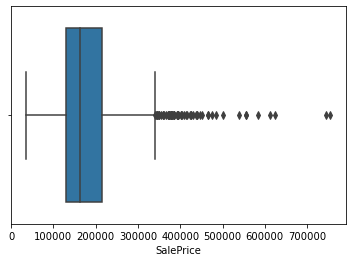

In [98]:
# Check for outliers 

sns.boxplot(x='SalePrice', data=house_train_set)

Text(0.5, 1.0, 'Correlation matrix ')

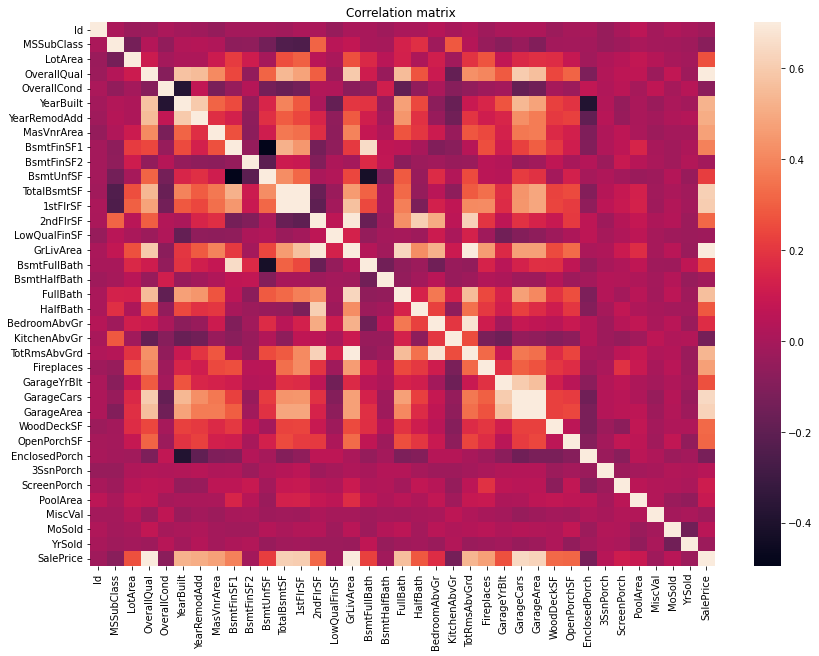

In [99]:
# Let's see the correlation between variables

corrmat = house_train_set.corr()
fig, axes = plt.subplots(figsize=(14, 10))
sns.heatmap(corrmat, vmax=.7);
plt.title("Correlation matrix ")

In [100]:
## Droping the 'Id' column 
train_set_without_id = house_train_set.drop(['Id'],axis=1)

In [101]:
# Let's pull categorical values

categorial_values = house_train_set.select_dtypes(include=['object'])
categorial_values.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal


In [102]:
# Convert them into dummies
dummies = pd.get_dummies(categorial_values, drop_first=True)
dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [103]:
# Let's add dummy categorical columns to our dataset
train_set_without_id = pd.concat([train_set_without_id,dummies], axis=1)

In [104]:
train_set_without_id.shape

(1460, 285)

In [106]:
# Let's drop all categorical columns

df = df.drop(list(categorial_values.columns), axis=1)

In [107]:
from sklearn.model_selection import train_test_split

df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [108]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [109]:
# Get numerical values

numerical_values=X_train.select_dtypes(include=['int64','float64']).columns
numerical_values

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [110]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_values] = scaler.fit_transform(X_train[numerical_values])
X_test[numerical_values] = scaler.transform(X_test[numerical_values])

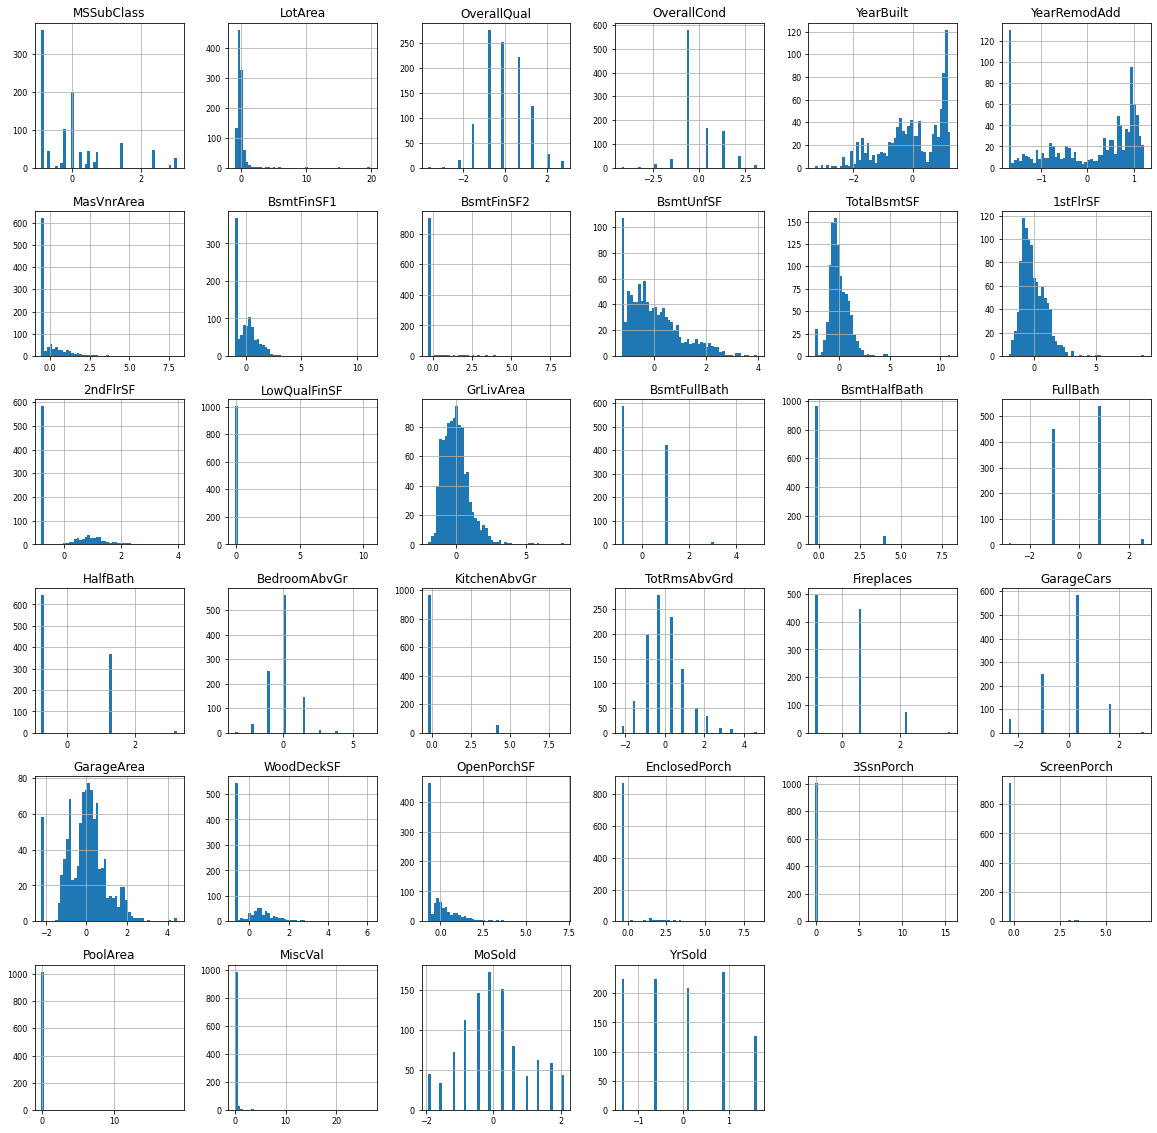

In [111]:
X_train[numerical_values].hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [112]:
# Let's build a linear regression model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [113]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
210,-0.657071,-0.473765,-0.779861,0.383154,-1.524903,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,...,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,0.134653
318,0.035976,-0.056845,0.649651,-0.533005,0.717033,0.390956,0.809137,1.160345,-0.293313,-0.454644,...,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,0.881833
239,-0.195040,-0.169324,-0.065105,-1.449164,-0.865510,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,...,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,1.629012
986,-0.195040,-0.502297,-0.065105,2.215472,-2.019448,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,...,-1.018473,2.423490,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,-0.104424,-1.359706
1416,3.039179,0.082905,-1.494617,0.383154,-2.843689,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,...,0.416000,-0.743160,-0.709347,1.435160,-0.121922,-0.275126,-0.062302,-0.084263,-0.832187,1.629012


In [116]:
# Let's calculate RFE with top 20 features
from sklearn.feature_selection import RFE

rfe = RFE(reg, step = 20)
rfe = rfe.fit(X_train, y_train)

In [117]:
col=X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'PoolArea'],
      dtype='object')

In [118]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

lr=sm.OLS(y_train,X_train_new)

lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     371.3
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:58:18   Log-Likelihood:                 510.20
No. Observations:                1021   AIC:                            -984.4
Df Residuals:                    1003   BIC:                            -895.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           12.0222      0.005   2593.539      0.000      12.013      12.031
MSSubClass      -0.0324      0.005     -6.316      0.000      -0.042      -0.022
LotArea          0.0172      0.005      3.355      0.001       0.007       0.027
OverallQual      0.1198      0.008     15.300      0.000       0.104       0.135
OverallCond      0.0507      0.006      9.059      0.000       0.040       0.062
YearBuilt        0.0883      0.008     11.074      0.000       0.073       0.104
YearRemodAdd     0.0274      0.007      4.125      0.000       0.014       0.040
TotalBsmtSF      0.0264      0.009      2.924      0.004       0.009       0.044
1stFlrSF        -0.0122      0.041     -0.299      0.765      -0.092       0.068
2ndFlrSF        -0.0165      0.044     -0.376      0.707      -0.103       0.070
GrLivArea        0.1270      0.054      2.360      0.018       0.021       0.233
BsmtFullBath     0.0429      0.005      8.292      0.000       0.033       0.053
FullBath         0.0146      0.007      2.093      0.037       0.001       0.028
TotRmsAbvGrd     0.0125      0.008      1.482      0.139      -0.004       0.029
Fireplaces       0.0374      0.006      6.659      0.000       0.026       0.048
GarageCars       0.0524      0.006      8.404      0.000       0.040       0.065
WoodDeckSF       0.0149      0.005      2.957      0.003       0.005       0.025
PoolArea        -0.0274      0.005     -5.534      0.000      -0.037      -0.018
==============================================================================
Omnibus:                      703.493   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30518.141
Skew:                          -2.592   Prob(JB):                         0.00
Kurtosis:                      29.277   Cond. No.                         39.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Let's start ridge regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [147]:
print(model_cv.best_params_, model_cv.best_score_)

{'alpha': 100} -0.09962430835335077


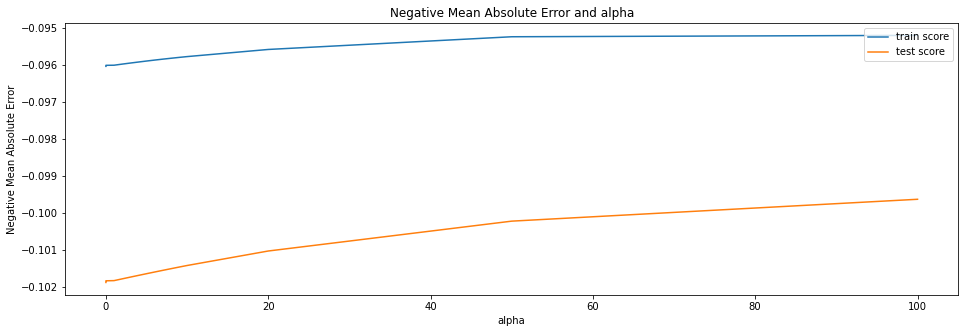

In [123]:
# Let's plot mean test and train scores with alpha
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('-ve Mean absolute error')
plt.title("-ve Mean absolute error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [158]:
# Ridge model with alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.74570962e-02,  1.73689110e-02,  1.15887704e-01,  4.67283945e-02,
        8.10134007e-02,  3.02853427e-02,  2.03177717e-03,  1.10098496e-02,
        3.10937106e-03,  5.27957665e-03,  1.74650778e-02,  3.93186767e-02,
        2.67716541e-02,  5.04878715e-03,  5.17770140e-02,  4.20005240e-02,
        8.02706241e-03,  2.61153799e-02,  1.31139002e-02,  5.38853939e-03,
       -1.39194234e-02,  1.81284207e-02,  3.18691611e-02, -3.29753765e-06,
        4.58011386e-02,  8.52314881e-03,  1.64245106e-02, -5.71786646e-03,
        8.70749525e-03,  7.76511579e-03,  1.47926689e-02, -2.81973633e-02,
       -1.21443544e-03, -2.29009646e-03, -1.06709272e-02])

In [159]:
#lets predict the R-squared value
from sklearn import metrics

y_train_pred = ridge.predict(X_train)

print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8677813917321113


In [127]:
# Prediction on test set

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8585096669434311


In [129]:
# Root mean squared error
from sklearn.metrics import r2_score,mean_squared_error

mean_squared_error(y_test, y_test_pred)

0.023280835888714792

In [130]:
# Let's see the results with lasso regression

params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# Cross-validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [131]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [133]:
print(lasso_cv.best_params_, lasso_cv.best_score_)

{'alpha': 0.001} -0.10113460452521779


In [150]:
alpha = 0.001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [151]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8676540182720165


In [136]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.859872305847319


In [137]:
mean_squared_error(y_test, y_test_pred)

0.023056627124683496

In [138]:
lasso.coef_

array([-2.72070398e-02,  1.69625644e-02,  1.18002233e-01,  4.61590826e-02,
        8.17025820e-02,  2.91423020e-02,  1.02744393e-03,  4.39002956e-03,
        1.46996880e-04, -0.00000000e+00,  2.18885736e-02,  1.44082602e-02,
        0.00000000e+00,  7.52299202e-04,  8.88363758e-02,  4.20705262e-02,
        7.40102097e-03,  2.34496278e-02,  1.07022617e-02,  4.66015293e-03,
       -1.28717822e-02,  1.66401836e-02,  3.14433518e-02, -2.01883866e-06,
        4.73595359e-02,  5.72617393e-03,  1.58776327e-02, -4.12444743e-03,
        7.19309594e-03,  6.80358681e-03,  1.39575861e-02, -2.69097063e-02,
       -8.95599735e-05, -1.33031455e-03, -9.41787344e-03])

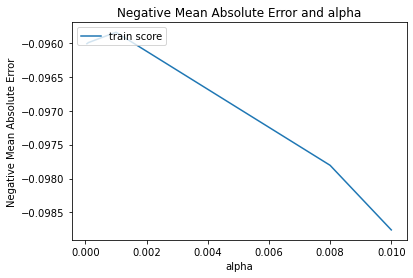

In [139]:
# Let's plot mean score with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [140]:
model_cv.best_params_

{'alpha': 100}

In [141]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8678197202567426
0.8582868220584459


In [142]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [143]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8676540182720165
0.859872305847319


In [144]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,12.030511
3,OverallCond,0.117690
5,YearRemodAdd,0.083471
15,BsmtFullBath,0.053218
4,YearBuilt,0.048053
25,GarageArea,0.047613
16,BsmtHalfBath,0.042792
12,2ndFlrSF,0.040324
23,GarageYrBlt,0.031550
6,MasVnrArea,0.029003


## After compairing both the model we can see that the below Features are best explaining the DataSet
### MSSubClass
### OverallCond
### YearRemodAdd
### BsmtFullBath
### GarageArea
### BsmtHalfBath
### 2ndFlrSF
### MasVnrArea